# Yapay Sinir Ağları

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

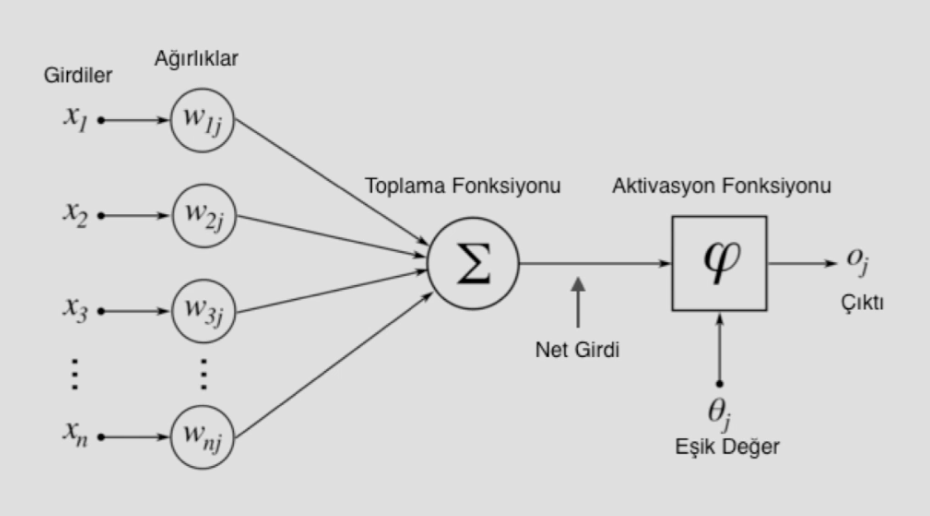

* x, bağımsız değişkenlerin değerleridir.
* bağımsız değişkenlerin bağımlı değişkene etkileri ağırlıklar aracılığıyla kontrol edilir.
* bağımsız değişkenlerin değerlerinin çıktıya olan etkilerinin kontrol edildiği anlamına gelir.
* minimum hata olması için ağırlıkları dikkatli seçmeliyiz
* belirli iterasyon sayısınca bu ağırlıklar optimum değerlerine ulaşmaya çalışıyor.

## Yapay Sinir Ağı

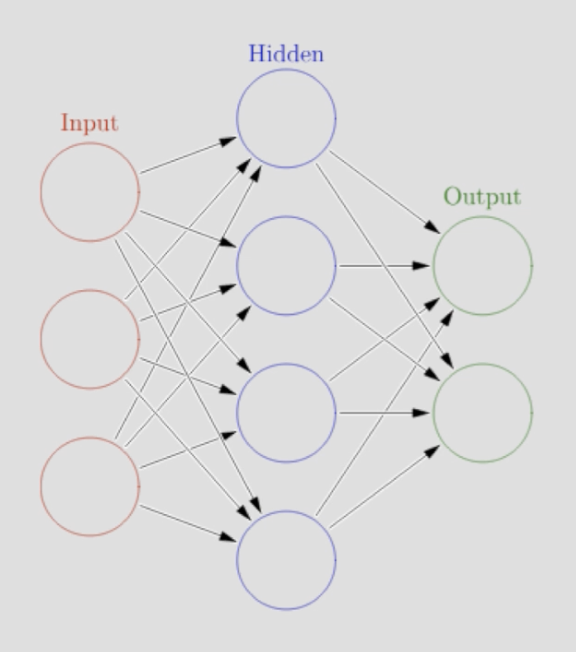

Yapay sinir hücreleri bir araya gelerek yapay sinir ağlarını oluşturuyor.
Yapay sinir ağları birbirleriyle ilişkilendirilmiş yapay sinir hücrelerinden oluşturulur.
Bu ağı oluşturan birimlere nöron adı verilir.
input girdi katmanı, hidden gizli katman, output çıktı katmanıdır.
hidden birden çok olabilir. ve kendi içerisinde farklı sayıda nöronlar olabilir.
çıktı değerleri yani tahmin edilen değerler gerçek y değerleriyle karşılaştırılır.
çıktı değerleri girdi olarak alınır bu iterasyon devam eder elde edilen katsayıların optimum değerleri bulunmaya çalışılır.


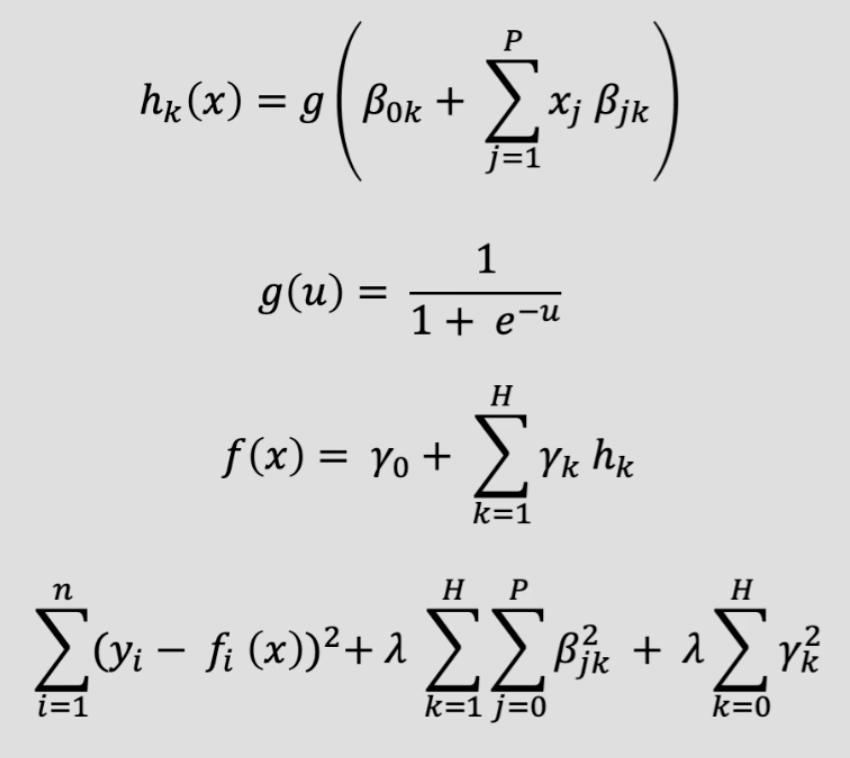

# Yapay Sinir Ağları - Model

### Çok Katmanlı Algılayıcı - Multi Layer Perceptron (MLP) 

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

birçok katman ve hücre olduğundan dolayı burada yer alan aykırılıklar veya değişkenlerin varyans yapılarının birbirinden farklı olması elde edilecek sonuçların güvenirliliğini düşürmektedir. Bundan dolayı YSA'da değişken standartlaştırma işlemi yapılmaktadır.

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(X_train)
# standartlaştırma, dönüştürme tamamlandı.
X_train_scaled = scaler.transform(X_train)

In [6]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:
# modeli oluşturalım
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [9]:
# katman sayısı: girdi, hidden, çıktı
mlp_model.n_layers_

3

In [10]:
# gizli katman sayısı
mlp_model.hidden_layer_sizes

(100,)

gizli (hidden) katman sayısını 2 yapalım:

In [11]:
# modeli oluşturalım
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [12]:
# katman sayısı: girdi(1), hidden(2), çıktı(1)
mlp_model.n_layers_

4

In [13]:
# gizli katman sayısı, 
# gizli katmanlarının içerisindeki elemanları, nöron sayısını ifade eder.
mlp_model.hidden_layer_sizes

(100, 20)

1. katman 100, 2. katman 20 nörondan oluşmuştur.

# Yapay Sinir Ağları - Tahmin

In [14]:
# y tahmin değerleri
y_pred = mlp_model.predict(X_test_scaled)
y_pred[0:5]

array([195.02090124, 315.49575442, 624.77575495, 118.35828474,
       219.35185172])

In [15]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

431.9387747330418

# Yapay Sinir Ağları - Model Tuning

In [17]:
mlp_params = {"alpha":[0.1,0.01,0.02,0.005],
             "hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)],
             "activation":["relu","logistic"]}

In [18]:
from sklearn.model_selection import GridSearchCV
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)

In [19]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [20]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

Final modelimizi oluşturalım

In [21]:
# relu ön tanımlı olduğundan yazmadım
mlp_tuned = MLPRegressor(alpha=0.02, hidden_layer_sizes = (100, 50, 150))

In [22]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [23]:
# final modelimizin test hatasını hesaplayalım
y_pred = mlp_tuned.predict(X_test_scaled)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.00511008488326

şu ana kadarki en düşük test hatasını veren yapay sinir ağı oldu.